# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 13 - Regresión Logística I: EDA
### Pilar García y Sonia Ruiz Pérez

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

**Objetivos**

In [109]:
#Librerías
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

- Buscar un conjunto de datos a analizar. Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

In [110]:
#Creamos un dataframe con los datos que queremos utilizar para nuestro estudio.
df=pd.read_csv('files/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.

In [111]:
#Analizamos el tipo de dato almacenado en cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


`Vemos que el tipo de dato se corresponde con lo que almacena cada columna.`

In [112]:
# Comprobamos los principales estadísticos de las columnas numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [113]:
# Comprobamos los principales estadísticos de las columnas categóricas.
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


`Viendo los datos de los principales estadísticos de las columnas numéricas y categóricas, podemos ver que no almacenan los mismos datos ninguna de ellas, por tanto la información no es redundante.`

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

In [114]:
#Vemos el número de filas y columnas que tiene el dataset.
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset tiene 918 filas y 12 columnas.


In [115]:
#Comprobamos los valores nulos del dataset.
df.stb.missing()

,missing,total,percent
Age,0,918,0.0
Sex,0,918,0.0
ChestPainType,0,918,0.0
RestingBP,0,918,0.0
Cholesterol,0,918,0.0
FastingBS,0,918,0.0
RestingECG,0,918,0.0
MaxHR,0,918,0.0
ExerciseAngina,0,918,0.0
Oldpeak,0,918,0.0


`Podemos ver que ninguna columna contiene valores nulos.`

In [116]:
#Comprobamos si tenemos alguna fila con datos duplicados.
df.duplicated().sum()

0

`No tenemos datos duplicados en el dataset.`

In [117]:
#Comprobamos de nuevo el tipo de dato de cada columna para cambiarlo si corresponde.
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [118]:
#Ponemos en minúsculas el nombre de las columnas.
columnas_minus={col:col.lower() for col in df.columns}
df.rename(columns=columnas_minus,inplace=True)
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [119]:
#Separamos aquellas columnas que tengan un nombre compuesto.
columnas_sep={'chestpaintype':'chest_pain_type', 'restingbp':'resting_bp', 'fastingbs':'fasting_bs',
              'restingecg':'resting_ecg', 'maxhr':'max_hr', 'exerciseangina':'exercise_angina',
              'heartdisease':'heart_disease'}
df.rename(columns=columnas_sep,inplace=True)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak',
       'st_slope', 'heart_disease'],
      dtype='object')

In [120]:
#Cambiamos el tipo de columnas a aquellas que son categorías.
columnas_categoricas=['sex', 'chest_pain_type','fasting_bs','resting_ecg','exercise_angina','st_slope']
for i in columnas_categoricas:
    df[i]=df[i].astype('category')
df.dtypes

age                   int64
sex                category
chest_pain_type    category
resting_bp            int64
cholesterol           int64
fasting_bs         category
resting_ecg        category
max_hr                int64
exercise_angina    category
oldpeak             float64
st_slope           category
heart_disease         int64
dtype: object

## `Variable respuesta`

In [121]:
#Comprobamos los valores únicos de nuestra variable respuesta.
valores_unicos_resp=df['heart_disease'].value_counts()
valores_unicos_resp

1    508
0    410
Name: heart_disease, dtype: int64

In [122]:
print(f'El porcetaje de personas con fallo cardiaco es: {round(valores_unicos_resp[1]*100/df.shape[0],2)}%. \nEl porcentaje de personas sin fallo cardiaco es: {round(valores_unicos_resp[0]*100/df.shape[0],2)}%.')

El porcetaje de personas con fallo cardiaco es: 55.34%. 
El porcentaje de personas sin fallo cardiaco es: 44.66%.


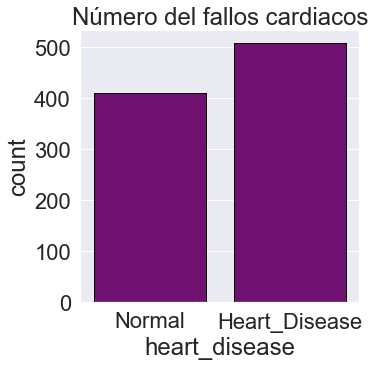

In [123]:
#Analizamos la variable respuesta visualmente.
plt.figure(figsize=(5,5))
fig=sns.countplot(data=df,x='heart_disease',color='purple',edgecolor='black')
fig.set(xticklabels=['Normal','Heart_Disease'])
plt.title('Número del fallos cardiacos')
plt.show()


`Nuestro dataset tiene una mayoría de personas con fallo cardiaco.`

## `Variables categóricas`

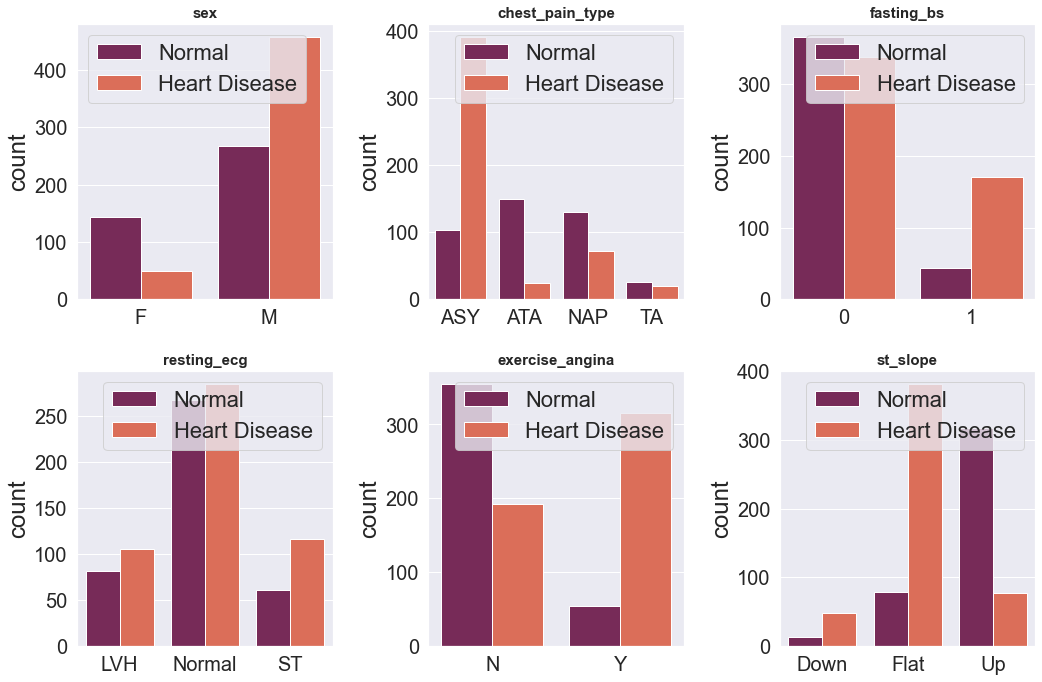

In [124]:
# Gráficos de distribución para cada variable categórica

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(data = df,x = colum,hue = "heart_disease",ax = axes[i],palette='rocket')
        
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    if colum == 'sex':
        axes[i].legend(labels=['Normal','Heart Disease'],loc= "upper left")
    else:
        axes[i].legend(labels=['Normal','Heart Disease'],loc= "upper right")

fig.tight_layout();

`Al analizar las variables categóricas de nuestro dataframe vemos:`
- **sex**: `los hombres tienen más fallos cardiacos que las mujeres.`
- **chest_pain_type**`: el dolor de pecho mayoritario es el asintomático en el caso de personas con fallo cardiaco. Las personas 'normales' tienen mayoritariamente 'atypical angina'.`
- **fasting_bs**`: la mayoria de la gente 'normal' tiene una glucosa en sangre inferior a 120mg/dl.`
- **resting_ecg**`: la mayoria de las personas tanto con o sin fallo cardiaco presentan unos resultados de electrocardiogramas en reposo de tipo normal.`
- **exercise_angina**`: la mayoria de las personas con fallo cardiaco presentaron una angina inducida por hacer ejercicio. Por otra parte, la mayoría de las personas sin fallo cardiaco no presentaron un episodio de angina inducida por el ejercicio.`
- **st_slope**`: la mayoría de personas con fallo cardiaco presentaron una pendiente en el segmento ST llana o de meseta. Mientras que las personas 'normales' presentaron una pendiente del segmento ST creciente.`

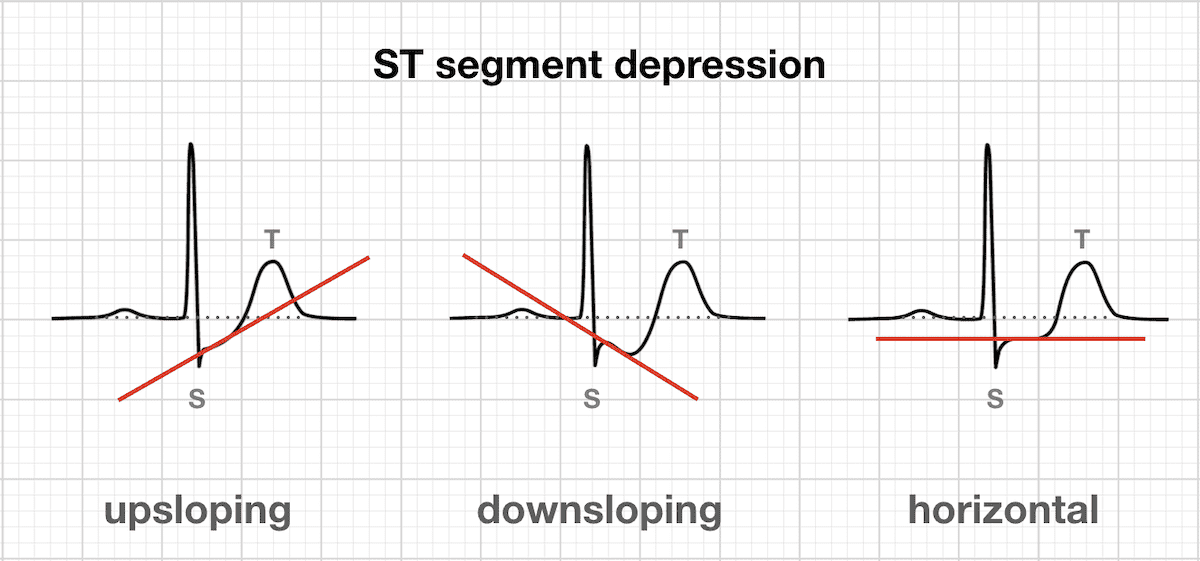

## `Variables numéricas`

In [125]:
df.dtypes

age                   int64
sex                category
chest_pain_type    category
resting_bp            int64
cholesterol           int64
fasting_bs         category
resting_ecg        category
max_hr                int64
exercise_angina    category
oldpeak             float64
st_slope           category
heart_disease         int64
dtype: object

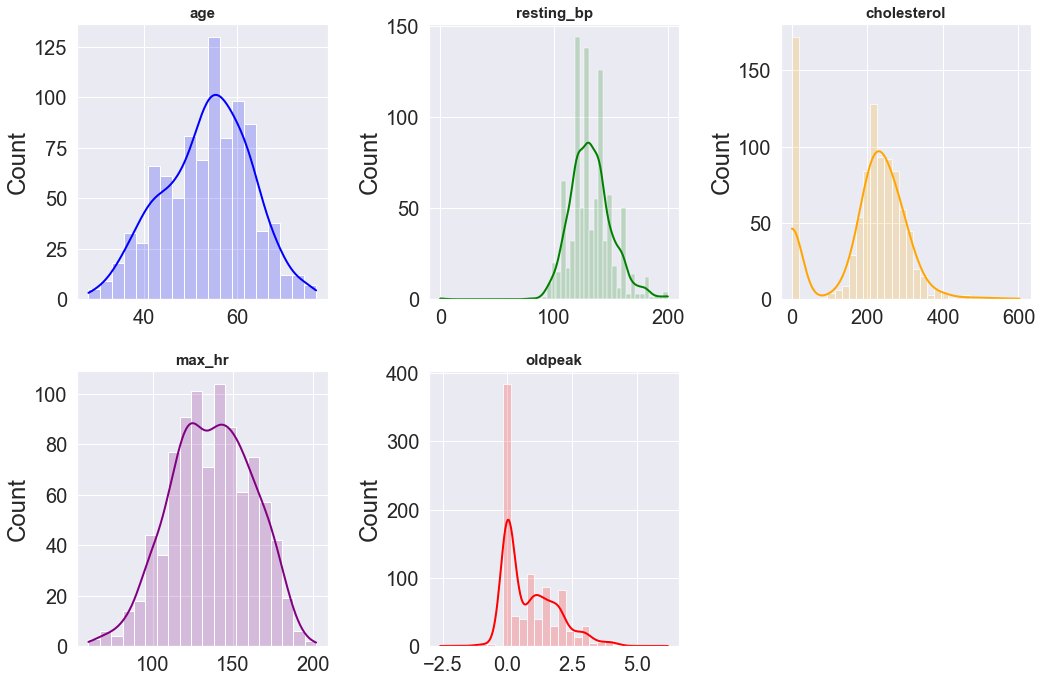

In [126]:
# Gráficos de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

lista_colores = ["blue", "green", "orange","purple", "red"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("heart_disease")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(data = df,x = colum,kde = True,color = lista_colores[i],line_kws = {"linewidth": 2},
                    alpha = 0.2,ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.delaxes(axes[-1])
fig.tight_layout();

`Al analizar las variables numéricas de nuestro dataframe vemos:`
- **age**: `la mayoría de personas de nuestro dataset se encuentra entre los 50 y los 60 años.`
- **resting_bp**: `la mayoría de persoans del estudio tienen una presión arterial en resposo entre 100-150 mm Hg. También podemos observar que hay registros con presión arterial de 0, deducimos no se ha registrado la presión arterial de estas personas.`
- **cholesterol**: `a simple vista presenta una distribución normal pero los niveles de colesterol que más se repiten se encuentran por encima de los 200ml/dl, por tanto las peroans registradas en el dataset presentan ua patología de colesterol alto.`
- **max_hr**: `los registros de pulsación máximas alcanzadas se encuentran entre 110 y 170 pulsaciones/minuto.`
- **old_peak**: `(depresión del ST inducida por el ejercicio en relación con el descanso) la mayoría se encuentran en valores de 0.` 

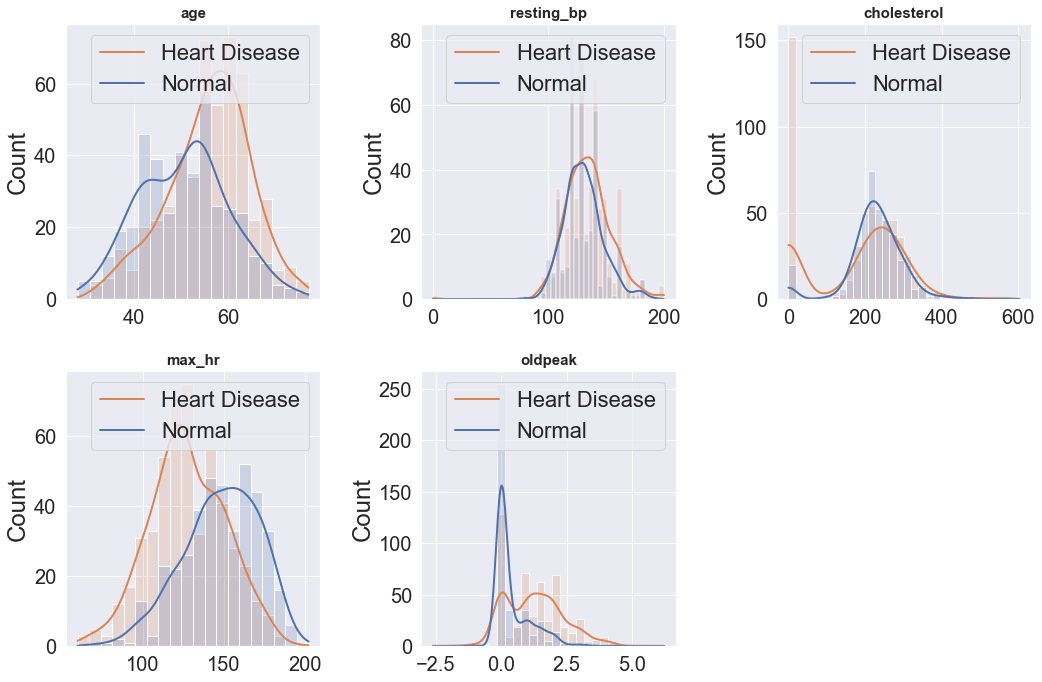

In [127]:
# Gráficos de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

lista_colores = ["blue", "green", "orange","purple", "red"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("heart_disease")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(data = df,x = colum,kde = True,color = lista_colores[i],line_kws = {"linewidth": 2},
                    alpha = 0.2,ax = axes[i],hue='heart_disease')
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(labels=['Heart Disease','Normal'])
fig.delaxes(axes[-1])
fig.tight_layout();

`Al analizar las variables numéricas de nuestro dataframe, dividiendo entre las personas con fallo cardiaco y las normales, vemos:`
- **age**: `la personas de mayor edad son los que han presentado fallo cardiaco. La mayoría de personas normales tienen una edad inferior a 60 años`
- **resting_bp**: `No se observa mucha diferencia entre las personas normales y las que han sufrido un fallo cardiaco.`
- **cholesterol**: `las personas que han sufrido un fallo cardiaco son las que han presentado valor 0 en la medición, lo que nos puede indicar que se desconocía sus niveles de colesterol.`
- **max_hr**: `las personas que han sufrido fallo cardiaco tienen pulsaciones en reposo más bajas que las personas normales.`
- **old_peak**: `(depresión del ST inducida por el ejercicio en relación con el descanso) la mayoría de personas normales se encuentran en valores de 0.` 

In [128]:
#Creamos un dataframe solo con las variabels numéricas.
df_numericas=df.select_dtypes(include=np.number)
df_numericas.head(3)

,age,resting_bp,cholesterol,max_hr,oldpeak,heart_disease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0


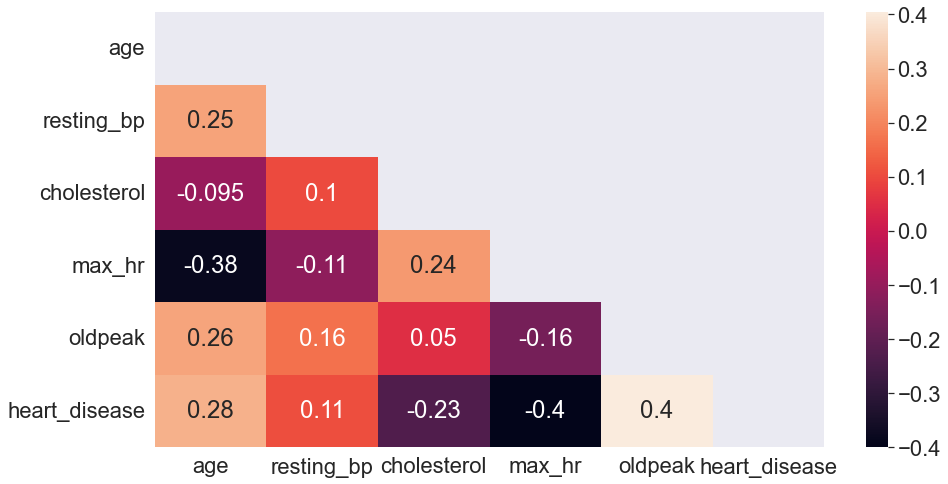

In [129]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=bool))
sns.heatmap(df_numericas.corr(), cmap="rocket", annot = True, mask = mask); #barra lateral

`No se observa una correlación superior a +-0.6 entre ninguna de nuestras variables numéricas, por lo que no tenemos que eliminar ninguna ya que no dan una información redundante.`

### `Detección de outliers`

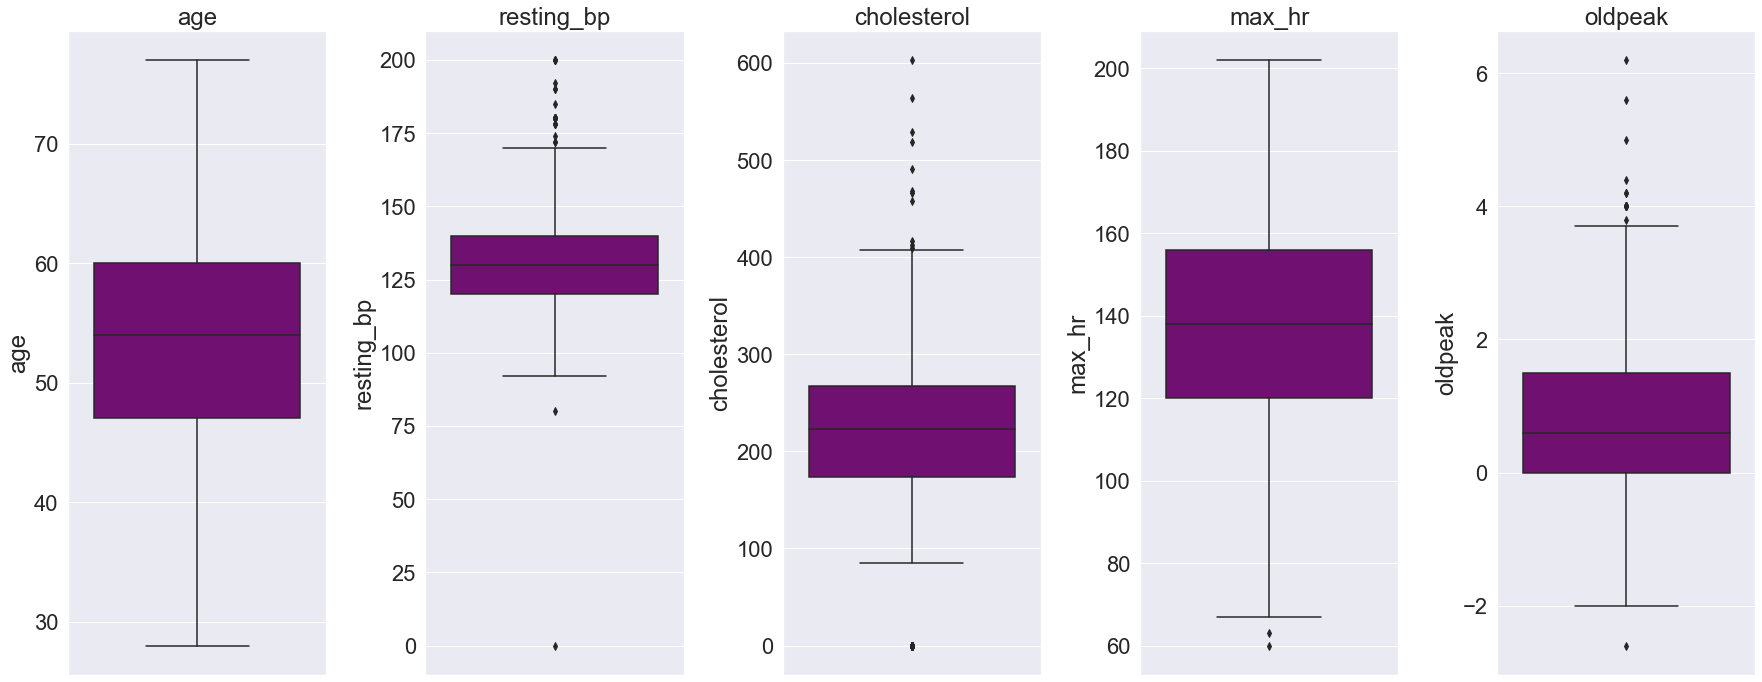

In [130]:
fig, axes = plt.subplots(1, 5, figsize=(25,10))
sns.set(font_scale=2)
categorias = df_numericas.drop("heart_disease", axis = 1).columns

axes = axes.flat

for indice, columna in enumerate(categorias):

    sns.boxplot(y = df[columna], data = df, ax=axes[indice], color = "purple")

    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")

fig.tight_layout();

`Vemos que 4 de las 5 columnas presentan outliers.`
-  **`resting_bp`** `,` **`cholesterol`** `y` **`oldpeak`** `: existen pocos outliers por debajo del Q1 y varios por encima del Q3.`
- **`max_hr`** `: solo presenta unos pocos outliers por debajo del Q1.`

In [131]:
# Creamos una función para obtener un diccionario con una lista de los índices de las filas donde tenemos
#  outliers (values) para cada columna (key).
def detectar_outliers(lista_columnas, dataframe): 

    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers

    for col in lista_columnas:   # iteramos por la lista de las columnas numéricas de nuestro dataframe
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        IQR = Q3 - Q1   # calculamos el rango intercuartílico
        outlier_step = 1.5 * IQR   # calculamos los límites

        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
                
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))

    return dicc_indices 

In [132]:
# aplicamos la función
indices_outliers = detectar_outliers(df_numericas.columns, df)
print(indices_outliers)

{'resting_bp': [109, 123, 189, 190, 241, 274, 275, 278, 314, 365, 372, 399, 411, 423, 449, 475, 550, 585, 592, 673, 702, 725, 732, 759, 774, 780, 855, 880], 'cholesterol': [28, 30, 69, 76, 103, 149, 250, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 421, 423, 424, 427, 428, 429, 430, 434, 435, 436, 437, 438, 439, 440, 441, 442, 446, 449, 450, 451, 453, 455, 456, 457, 458, 459, 461, 463, 464, 466, 467, 470, 471, 472, 474, 475, 4

In [133]:
for k,v in indices_outliers.items():
    print(f'La columna {k} tiene {len(v)} outliers.')

La columna resting_bp tiene 28 outliers.
La columna cholesterol tiene 183 outliers.
La columna max_hr tiene 2 outliers.
La columna oldpeak tiene 16 outliers.


#### `Tratamiento de los outliers`

`Vamos a tratar los outliers de las columnas 'resting_bp', 'oldpeak' y 'max_hr' eliminándolos puesto que la suma de los 3 (quitando los reptidos) no superan el 4,79% de los datos. El resto de outliers nos los vamos a eliminar pero sí los vamos a separar en otro nuevo dataframe pero su posterior estudio por separado.`

In [134]:
#Comprobamos las keys antes modificar el diccionario.
indices_outliers.keys()

dict_keys(['resting_bp', 'cholesterol', 'max_hr', 'oldpeak'])

In [135]:
#Eliminamos la key 'cholesterol' y comprobamos de nuevo las keys.
indices_outliers.pop('cholesterol')
indices_outliers.keys()

dict_keys(['resting_bp', 'max_hr', 'oldpeak'])

In [136]:
#Creamos un set para que no se repitran los indices.
valores_indices_outliers=indices_outliers.values()
set_valores_indices_outliers={indice for sublista in valores_indices_outliers for indice in sublista}
print(set_valores_indices_outliers)

{771, 900, 774, 390, 775, 521, 780, 908, 399, 274, 275, 278, 791, 537, 411, 673, 550, 423, 166, 559, 314, 189, 190, 702, 449, 68, 324, 585, 592, 850, 725, 855, 475, 732, 109, 365, 880, 241, 370, 624, 372, 500, 759, 123}


In [137]:
#Comprobamos el tamaño del dataframe antes de eliminar filas.
df.shape

(918, 12)

In [138]:
#Eliminamos del dataframe los indices del set y comprobamos el nuevo tamaño del dataframe.
df.drop(set_valores_indices_outliers,axis=0,inplace=True)
df.shape

(874, 12)

In [139]:
#Detectamos de nuevo los outliers para separar los de la columna 'cholesterol' en otro dataframe para su futuro análisis.
indices_outliers2 = detectar_outliers(df_numericas.columns, df)
print(indices_outliers2)

{'cholesterol': [28, 30, 69, 76, 103, 149, 182, 250, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 412, 413, 414, 415, 421, 424, 427, 428, 429, 430, 434, 435, 436, 437, 438, 439, 440, 441, 442, 446, 450, 451, 453, 455, 456, 457, 458, 459, 461, 463, 464, 466, 467, 470, 471, 472, 474, 477, 479, 480, 481, 483, 484, 492, 496, 508, 514, 515, 518, 535, 536, 616, 667, 796]}


In [140]:
df_final=df.copy()

In [141]:
#Comprobamos el tamaño del dataframe antes de eliminar filas.
df_final.shape

(874, 12)

In [142]:
#Eliminamos el dataframe con el que vamos a continuar el analisis principal.
df_final.drop(indices_outliers2['cholesterol'],axis=0,inplace=True)

In [143]:
#Comprobamos el tamaño del dataframe tras la eliminacion de esas filas.
df_final.shape

(701, 12)

In [144]:
#Creamos el dataframe con los datos que tenian outliers en 'cholesterol' y creemos que se pueden
#  analizar en un modelo diferente.
df_colesterol=df.iloc[indices_outliers2['cholesterol']]
df_colesterol

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
77,35,F,ASY,140,167,0,Normal,150,N,0.0,Up,0
104,46,M,ASY,118,186,0,Normal,124,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
561,54,M,ATA,132,182,0,ST,141,N,0.1,Up,0
562,59,M,ASY,140,274,0,Normal,154,Y,2.0,Flat,0
645,57,M,NAP,128,229,0,LVH,150,N,0.4,Flat,1
697,58,M,ASY,150,270,0,LVH,111,Y,0.8,Up,1


In [145]:
#Comprobamos los valores únicos de nuestra variable respuesta final.
valores_unicos_resp_final=df_final['heart_disease'].value_counts()
valores_unicos_resp_final

0    377
1    324
Name: heart_disease, dtype: int64

In [146]:
print(f'El porcentaje de personas con fallo cardiaco es: {round(valores_unicos_resp_final[1]*100/df_final.shape[0],2)}%. \nEl porcentaje de personas sin fallo cardiaco es: {round(valores_unicos_resp_final[0]*100/df_final.shape[0],2)}%.')

El porcentaje de personas con fallo cardiaco es: 46.22%. 
El porcentaje de personas sin fallo cardiaco es: 53.78%.


`Vemos que los porcetanjes han variado, pues ahora tenemos más personas sin fallo cardiaco, pero ambos porcentajes están menos desbalanceados.`

In [147]:
df_final.reset_index(inplace=True)

In [150]:
df_final.columns

Index(['index', 'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak',
       'st_slope', 'heart_disease'],
      dtype='object')

In [152]:
df_final.drop(['index'],axis=1,inplace=True)

In [154]:
df_final.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak',
       'st_slope', 'heart_disease'],
      dtype='object')

In [155]:
#Guardamos el dataframe para nuestro estudio principal.
df_final.to_csv('files/heart_eda_principal.csv')

In [103]:
#Guardamos el dataframe para nuestro estudio de los outliers del colesterol.
df_colesterol.to_csv('files/heart_eda_colesterol.csv')

- Interpretación de los resultados.

`Hemos ido interpretando los resultados a lo largo del pair.`

**Happy coding** 📊📈📉